In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electric-vehicle-population-dataset/Electric_Vehicle_Population_Data.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
df = pd.read_csv('/kaggle/input/electric-vehicle-population-dataset/Electric_Vehicle_Population_Data.csv')
df.head(5)

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJSA1E22K,King,Seattle,WA,98112.0,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,0,43.0,202233958,POINT (-122.300312 47.629782),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
1,3MW39FS05R,Yakima,Zillah,WA,98953.0,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,0,15.0,264425178,POINT (-120.2658133 46.4063477),PACIFICORP,5.307700e+10
2,1N4AZ0CP0F,King,Kent,WA,98031.0,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,0,11.0,114962025,POINT (-122.201564 47.402358),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,5YJSA1H20F,Snohomish,Bothell,WA,98012.0,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,0,1.0,232724670,POINT (-122.206146 47.839957),PUGET SOUND ENERGY INC,5.306105e+10
4,JTMAB3FV1N,Yakima,Yakima,WA,98908.0,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,0,14.0,221023589,POINT (-120.611068 46.596645),PACIFICORP,5.307700e+10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 191407 entries, 0 to 191406
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         191407 non-null  object 
 1   County                                             191403 non-null  object 
 2   City                                               191403 non-null  object 
 3   State                                              191407 non-null  object 
 4   Postal Code                                        191403 non-null  float64
 5   Model Year                                         191407 non-null  int64  
 6   Make                                               191407 non-null  object 
 7   Model                                              191407 non-null  object 
 8   Electric Vehicle Type                              191407 non-null  object

In [5]:
# checking null values sum

df.isnull().sum()

VIN (1-10)                                             0
County                                                 4
City                                                   4
State                                                  0
Postal Code                                            4
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                         0
Base MSRP                                              0
Legislative District                                 414
DOL Vehicle ID                                         0
Vehicle Location                                       8
Electric Utility                                       4
2020 Census Tract                                      4
dtype: int64

In [6]:
# dropping irrevalent columns

df.drop(['VIN (1-10)', 'Postal Code', 'Base MSRP', 'Legislative District', 'DOL Vehicle ID', 'Electric Utility','2020 Census Tract'],axis=1, inplace=True)
df.head(5)

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Vehicle Location
0,King,Seattle,WA,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,POINT (-122.300312 47.629782)
1,Yakima,Zillah,WA,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,POINT (-120.2658133 46.4063477)
2,King,Kent,WA,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,POINT (-122.201564 47.402358)
3,Snohomish,Bothell,WA,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,POINT (-122.206146 47.839957)
4,Yakima,Yakima,WA,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,POINT (-120.611068 46.596645)


In [7]:
df.head(5)

,County,City,State,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Vehicle Location
0,King,Seattle,WA,2019,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,270,POINT (-122.300312 47.629782)
1,Yakima,Zillah,WA,2024,BMW,330E,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,20,POINT (-120.2658133 46.4063477)
2,King,Kent,WA,2015,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,84,POINT (-122.201564 47.402358)
3,Snohomish,Bothell,WA,2015,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,POINT (-122.206146 47.839957)
4,Yakima,Yakima,WA,2022,TOYOTA,RAV4 PRIME,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,42,POINT (-120.611068 46.596645)


In [8]:
# checking rows and columns

df.shape

(191407, 10)

In [9]:
df.isnull().sum()

County                                               4
City                                                 4
State                                                0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Vehicle Location                                     8
dtype: int64

In [10]:
# dropping na values from df

df = df.dropna()

In [11]:
# which county we have more  entries (top 10)

Counties = df.groupby('County').count().sort_values(by='City',ascending=False)['City'].index
values = df.groupby('County').count().sort_values(by='City',ascending=False)['City'].values

px.bar(x=list(Counties)[:10],y=values[:10],labels={'x':"County Name",'y':'Number of Cars'},color=values[:10])

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



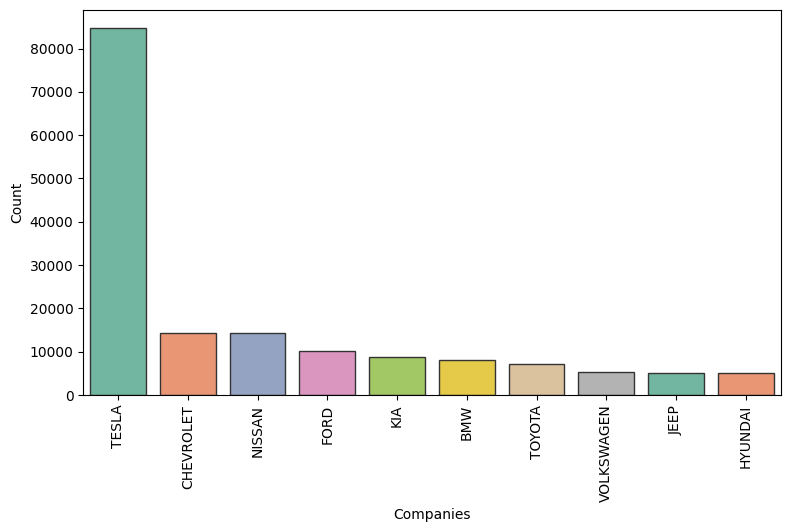

In [12]:
# let's see which company makes most of the electric vehicles

Companies = df.groupby('Make').count().sort_values(by='City',ascending=False)['City'].index 
values = df.groupby('Make').count().sort_values(by='City',ascending=False)['City'].values

plt.figure(figsize=(9,5))
sns.barplot(x=list(Companies)[:10],y=values[:10],edgecolor='.2',palette='Set2')
plt.xticks(rotation='vertical')
plt.xlabel('Companies')
plt.ylabel('Count')
plt.show()

In [13]:
# Pie Chart for Companies

px.pie(names=list(Companies)[:10],values=values[:10],width=500,height=400)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



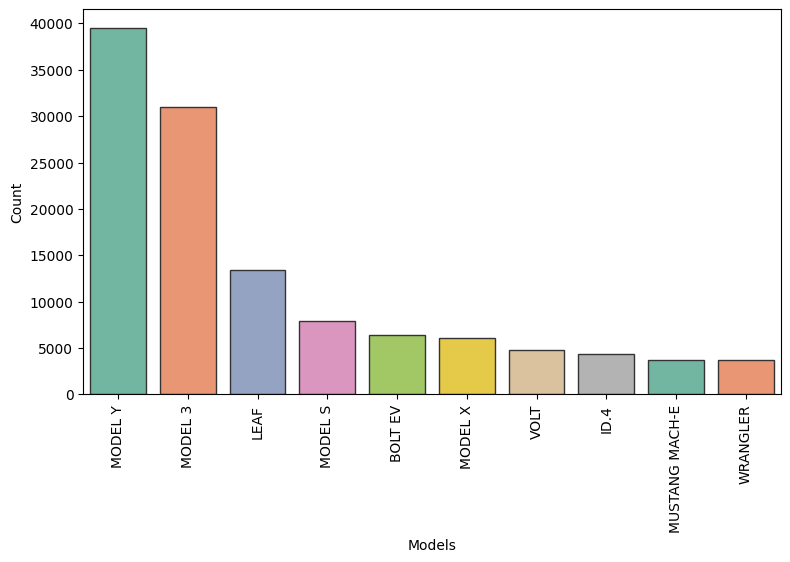

In [14]:
# Top 10 models in use

Models = df.groupby('Model').count().sort_values(by='City',ascending=False)['City'].index
values = df.groupby('Model').count().sort_values(by='City',ascending=False)['City'].values

plt.figure(figsize=(9,5))
sns.barplot(x=list(Models)[:10],y=values[:10],edgecolor='.2',palette='Set2')
plt.xticks(rotation='vertical')
plt.xlabel('Models')
plt.ylabel('Count')
plt.show()

In [15]:
# what are the most sold models per each company
# lets consider the top 10 companies

top_10_companies = list(Companies)[:10]
for i in top_10_companies:
    data = df[df['Make']==i]
    data = data.groupby('Model').count().sort_values(by='City',ascending=False).index
    print('Top selling model for',i,'is ---------->',data[0])

Top selling model for TESLA is ----------> MODEL Y
Top selling model for CHEVROLET is ----------> BOLT EV
Top selling model for NISSAN is ----------> LEAF
Top selling model for FORD is ----------> MUSTANG MACH-E
Top selling model for KIA is ----------> NIRO
Top selling model for BMW is ----------> X5
Top selling model for TOYOTA is ----------> PRIUS PRIME
Top selling model for VOLKSWAGEN is ----------> ID.4
Top selling model for JEEP is ----------> WRANGLER
Top selling model for HYUNDAI is ----------> IONIQ 5


In [16]:
# Percentage of BEV vs PHEV

Vehicle_type = list(df.groupby('Electric Vehicle Type').count()['County'].index)
values = df.groupby('Electric Vehicle Type').count()['County'].values

px.pie(names=Vehicle_type,values=values,height=400)

In [17]:
# let's make whats the percentage of top 10 companies vehicles are BEV and PHEV

for index, i in enumerate(top_10_companies):
    data = df[df['Make']==i]
    labels = list(data.groupby('Electric Vehicle Type').count()['City'].index)
    values = list(data.groupby('Electric Vehicle Type').count()['City'].values)
    fig = px.pie(names=labels, values=values, width=700, height=400, title=str(i))
    fig.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warn

<Axes: xlabel='Electric Range', ylabel='Count'>

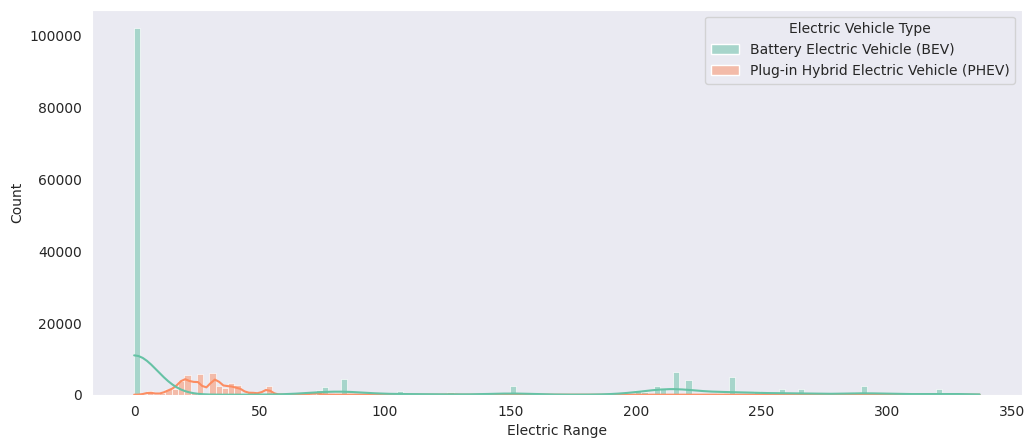

In [18]:
# let's see the electric range difference between PHEV and BEV

plt.figure(figsize=(12,5))
sns.set_style(style='dark')
sns.histplot(x='Electric Range',data=df, kde=True, hue='Electric Vehicle Type', palette='Set2')

In [19]:
# the data shows that BEVs will give more range but there are some vehicles which give almost 0 range on PHEV

df[df['Electric Range']==0].shape

(102132, 10)

/tmp/ipykernel_33/2761627028.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of p

<Axes: xlabel='Electric Range', ylabel='Density'>

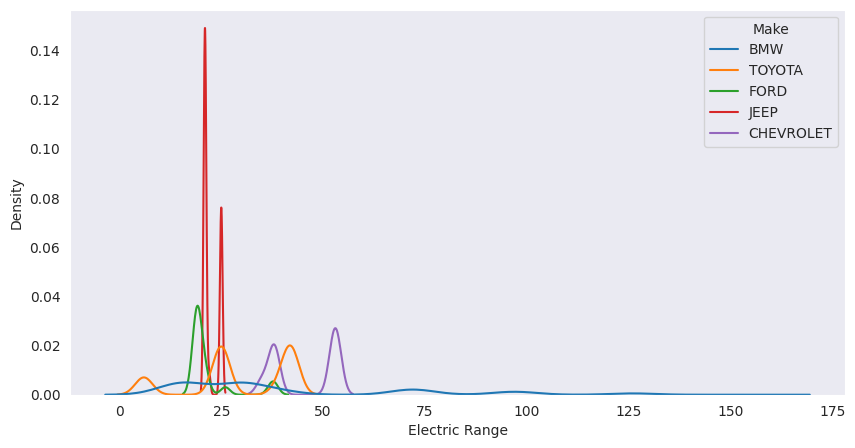

In [20]:
# let's filter out top 5 companies as per electric vehicle type

#PHEV

data_phev = df[df['Electric Vehicle Type']=='Plug-in Hybrid Electric Vehicle (PHEV)']
companies = list(data_phev.groupby('Make').count().sort_values(by='City',ascending=False)['City'].index)[:5]
data_phev['phe'] = data_phev['Make'].apply(lambda x:1 if x in companies else 0)
data_phev = data_phev[data_phev['phe']==1]

plt.figure(figsize=(10,5))
sns.kdeplot(x='Electric Range', hue='Make', data=data_phev)

/tmp/ipykernel_33/1775788819.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning:

When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of p

<Axes: xlabel='Electric Range', ylabel='Density'>

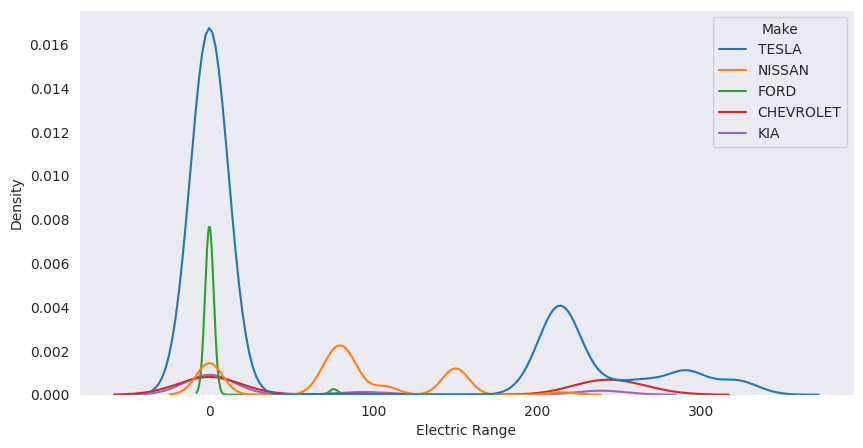

In [21]:
#BEV

data_bev = df[df['Electric Vehicle Type']!='Plug-in Hybrid Electric Vehicle (PHEV)']
companies = list(data_bev.groupby('Make').count().sort_values(by='City', ascending=False)['City'].index)[:5]
data_bev['bev'] = data_bev['Make'].apply(lambda x:1 if x in companies else 0)
data_bev = data_bev[data_bev['bev']==1]

plt.figure(figsize=(10,5))
sns.kdeplot(x='Electric Range', hue='Make', data=data_bev)

In [22]:
# let's see top 10 most sold cars and top 10 most range giving vehicles and check if there is any correlation

top_10_vehicles = list(df.groupby('Model').count().sort_values(by='City', ascending=False)['City'].index)[:10]

In [23]:
top_10_range = df.sort_values(by='Electric Range', ascending=False)['Model'].unique()[:10]

In [24]:
top_10_vehicles

['MODEL Y',
 'MODEL 3',
 'LEAF',
 'MODEL S',
 'BOLT EV',
 'MODEL X',
 'VOLT',
 'ID.4',
 'MUSTANG MACH-E',
 'WRANGLER']

In [25]:
top_10_range

array(['MODEL S', 'MODEL 3', 'MODEL X', 'MODEL Y', 'BOLT EV', 'KONA',
       'ROADSTER', 'NIRO', 'I-PACE', 'PS2'], dtype=object)

<Axes: xlabel='Model Year', ylabel='count'>

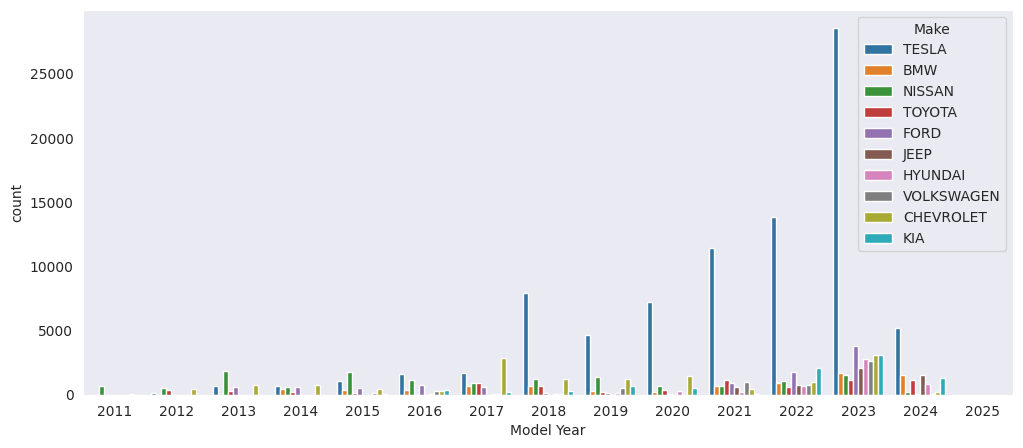

In [26]:
# Number of models of company for each year for last 10 years

data = df.copy()
data['top_10'] = data['Make'].apply(lambda x:1 if x in top_10_companies else 0)
data = data[data['top_10']==1]
data = data[data['Model Year']>=2011]

plt.figure(figsize=(12,5))
sns.countplot(x='Model Year', hue='Make', data=data)

In [27]:
# earlier NISSAN and CHEVY used to have hold of the market then TESLA took over it
# if we study an individual company TESLA
# Which state is having more number of TESLA vehicle
# Model of which year is in use the most from TESLA

data_TESLA = df[df['Make']=='TESLA']
top_10_states_TESLA = list(data_TESLA.groupby('State').count().sort_values(by='City',ascending=False)['City'].index)[:10]
values = list(data_TESLA.groupby('State').count().sort_values(by='City',ascending=False)['City'].values)[:10]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



<Axes: >

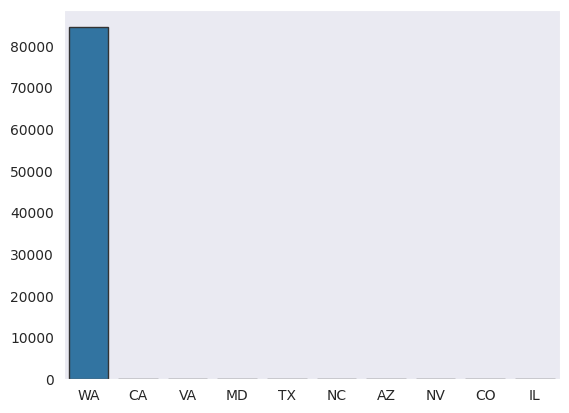

In [28]:
sns.barplot(x=top_10_states_TESLA, y=values, edgecolor='.2')

In [29]:
values

[84464, 55, 25, 14, 14, 10, 7, 6, 6, 5]

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



<Axes: >

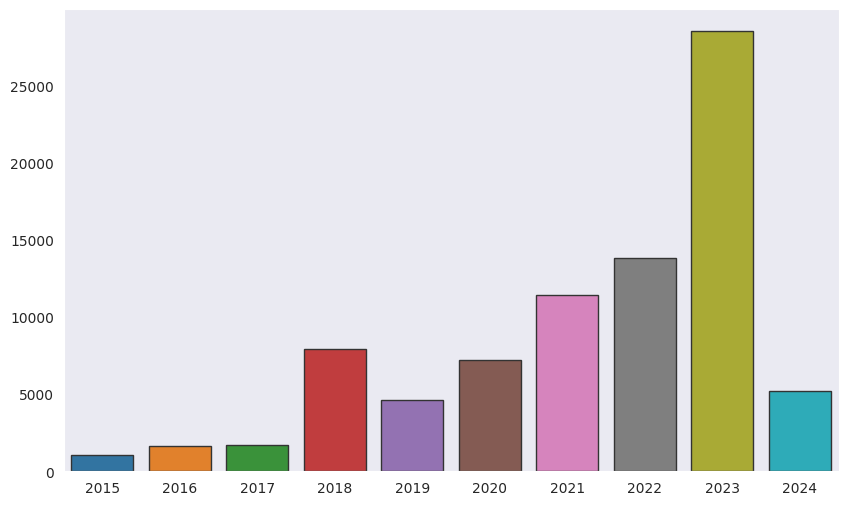

In [30]:
plt.figure(figsize=(10,6))
top_10_year_TESLA = list(data_TESLA.groupby('Model Year').count().sort_values(by='City',ascending=False)['City'].index)[:10]
values = list(data_TESLA.groupby('Model Year').count().sort_values(by='City',ascending=False)['City'].values)[:10]

sns.barplot(x = top_10_year_TESLA,y=values,edgecolor='.2')

(20.0, 60.0)

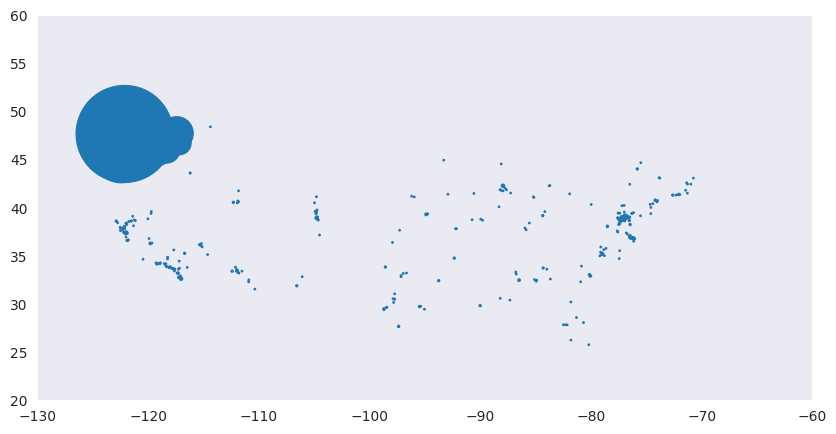

In [31]:
locations = list(df.groupby('Vehicle Location').count()['County'].index)
values = list(df.groupby('Vehicle Location').count()['County'].values)
Location_data = pd.DataFrame({'Locations':locations,'Count':values})
Location_data['Lattitude'] = Location_data['Locations'].apply(lambda x:float(x.split(' ')[1][1:]))
Location_data['Longitude'] = Location_data['Locations'].apply(lambda x:float(x.split(' ')[2][:-1]))

plt.figure(figsize=(10,5))
plt.scatter(x = Location_data['Lattitude'],y = Location_data['Longitude'],s=Location_data['Count'])
plt.xlim(-130,-60)
plt.ylim(20,60)

In [32]:
df['Lattitude'] = df['Vehicle Location'].apply(lambda x:float(x.split(' ')[1][1:]))
df['Longitude'] = df['Vehicle Location'].apply(lambda x:float(x.split(' ')[2][:-1]))

(20.0, 50.0)

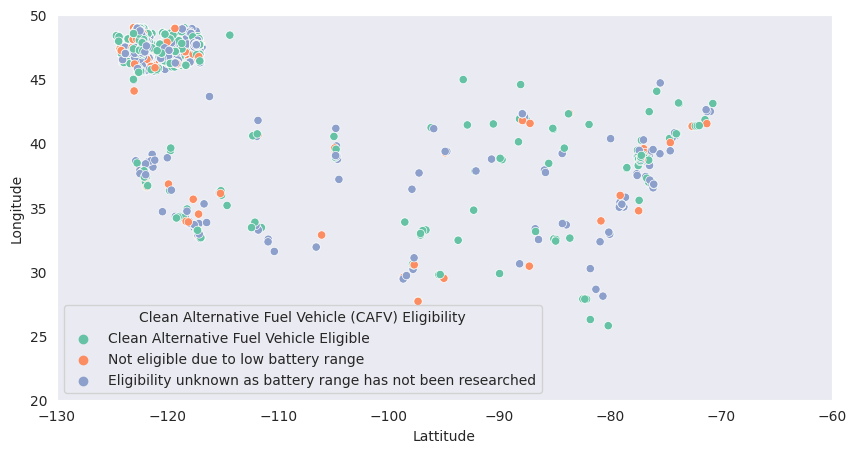

In [33]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Lattitude',y = 'Longitude',data=df,hue='Clean Alternative Fuel Vehicle (CAFV) Eligibility',palette='Set2')
plt.xlim(-130,-60)
plt.ylim(20,50)

(20.0, 50.0)

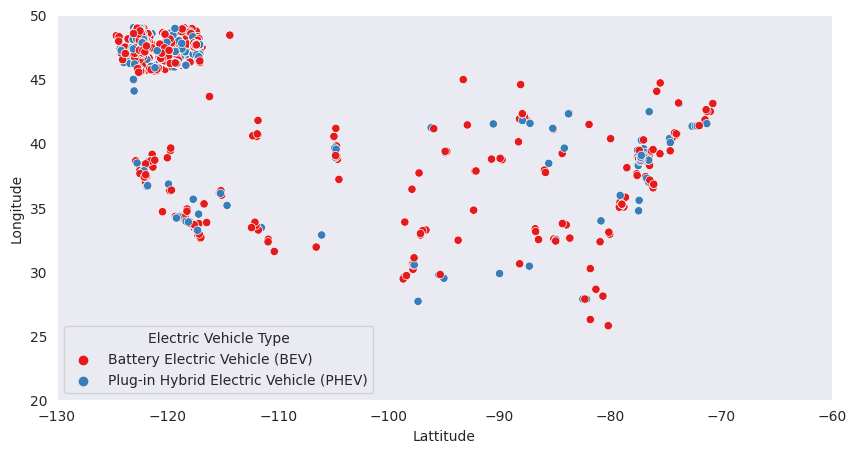

In [34]:
plt.figure(figsize=(10,5))
sns.scatterplot(x = 'Lattitude',y = 'Longitude',data=df,hue='Electric Vehicle Type',palette='Set1')
plt.xlim(-130,-60)
plt.ylim(20,50)

In [35]:
states = list(df.groupby('State').count().sort_values(by='City',ascending=False)['City'].index)
values = df.groupby('State').count().sort_values(by='City',ascending=False)['City'].values

In [36]:
data = data.reset_index()